In [1]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt

In [2]:
Es = 207e9
d1 = 38.1e-3
d2 = 50.8e-3
J1 = np.pi/64 * d1**4
J2 = np.pi/64 * d2**4
q = -35e3
l1 = 0.15
l2 = 0.3

In [3]:
class Problem:
    
    def __init__(self, n1, n2):
        x1 = np.linspace(0, l1, n1-1, endpoint=False)
        x2 = np.linspace(l1, l1+l2, n2-1, endpoint=False)
        x3 = np.linspace(l1+l2, 2*l1+l2, n1)
        self.n1 = n1
        self.n2 = n2
        self.x = np.concatenate([x1, x2, x3])
        self.matK()
        self.vecF()
        pass
    
    def partK(self, h, J):
        return Es * J * np.array([
            [12/h**3, 6/h**2, -12/h**3, 6/h**2],
            [6/h**2, 4/h, -6/h**2, 2/h],
            [-12/h**3, -6/h**2, 12/h**3, -6/h**2],
            [6/h**2, 2/h, -6/h**2, 4/h]
        ])
        pass
    
    def matK(self):
        self.mat_k = np.zeros((2*len(self.x), 2*len(self.x)))
        for i in range(self.n1-1):
            h = self.x[i+1] - self.x[i]
            self.mat_k[i*2: i*2+4, i*2: i*2+4] += self.partK(h, J1)
            pass
        for i in range(self.n1-1, self.n1+self.n2-2):
            h = self.x[i+1] - self.x[i]
            self.mat_k[i*2: i*2+4, i*2: i*2+4] += self.partK(h, J2)
            pass
        for i in range(self.n1+self.n2-2, 2*self.n1+self.n2-3):
            h = self.x[i+1] - self.x[i]
            self.mat_k[i*2: i*2+4, i*2: i*2+4] += self.partK(h, J1)
            pass
        pass
    
    def partF(self, h, q):
        return q * np.array([
            h/2, h**2/12, h/2, -h**2/12
        ])
        pass
    
    def vecF(self):
        self.vec_f = np.zeros(2*len(self.x))
        for i in range(self.n1-1, self.n1+self.n2-2):
            h = self.x[i+1] - self.x[i]
            self.vec_f[i*2: i*2+4] += self.partF(h, q)
            pass
        pass
    
    def solve(self):
        u = np.zeros(2*len(self.x))
        dirichlet_ids = np.array([0, 1, len(self.x)*2-2, len(self.x)*2-1], dtype=int)
        tosolve_ids = np.array([i for i in range(2*len(self.x)) if i not in dirichlet_ids], dtype=int)
        u[tosolve_ids] = np.linalg.solve(self.mat_k[tosolve_ids].T[tosolve_ids].T, self.vec_f[tosolve_ids])
        self.w = u[0::2]
        self.theta = u[1::2]
        pass
    
    def interpolate(self, n_each):
        h = spi.CubicHermiteSpline(self.x, self.w, self.theta)
        self.x_minor = np.linspace(0, 2*l1+l2, (self.n1*2+self.n2-3)*n_each+1)
        self.w_inter = h(self.x_minor)
        self.theta_inter = h(self.x_minor, 1)
        pass
    
    pass

In [4]:
p1 = Problem(2, 2)
p1.solve()
p1.interpolate(10)
p2 = Problem(2, 3)
p2.solve()
p2.interpolate(10)
p3 = Problem(21, 41)
p3.solve()

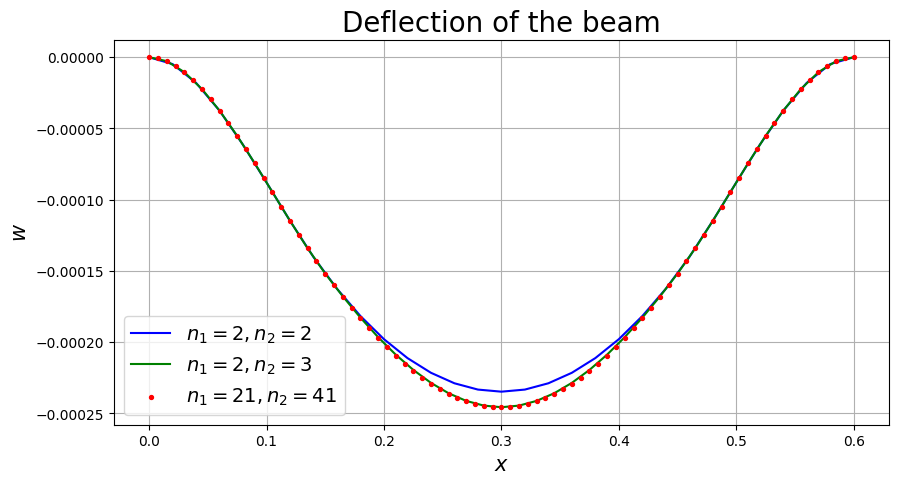

In [5]:
plt.figure(figsize=(10, 5), facecolor="white")
plt.plot(p1.x_minor, p1.w_inter, color="b", label="$n_1=2, n_2=2$")
plt.plot(p2.x_minor, p2.w_inter, color="g", label="$n_1=2, n_2=3$")
plt.scatter(p3.x, p3.w, s=8, label="$n_1=21, n_2=41$", color="r", zorder=10)
plt.legend(fontsize=14, loc="lower left")
plt.grid()
plt.xlabel("$x$", fontsize=15)
plt.ylabel("$w$", fontsize=15)
plt.title("Deflection of the beam", fontsize=20)
plt.savefig("images/problem2_beam_deflection.png", dpi=300, bbox_inches="tight")
plt.show()

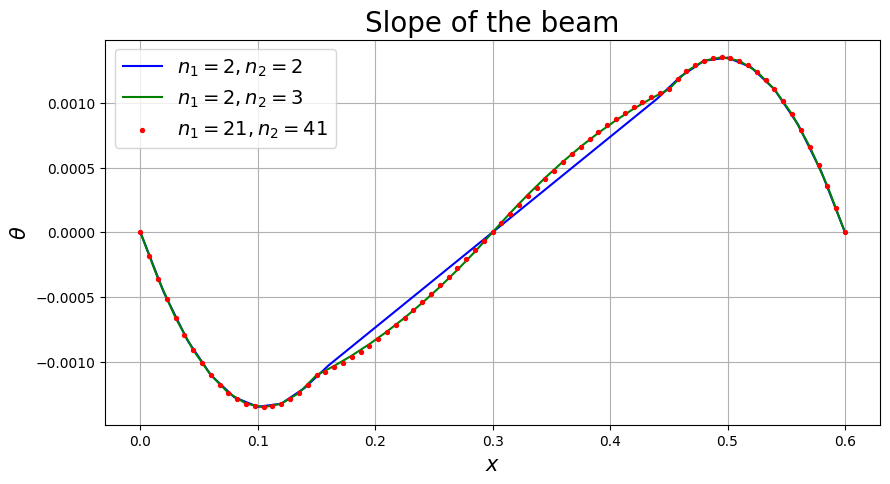

In [6]:
plt.figure(figsize=(10, 5), facecolor="white")
plt.plot(p1.x_minor, p1.theta_inter, color="b", label="$n_1=2, n_2=2$")
plt.plot(p2.x_minor, p2.theta_inter, color="g", label="$n_1=2, n_2=3$")
plt.scatter(p3.x, p3.theta, s=8, label="$n_1=21, n_2=41$", color="r", zorder=10)
plt.legend(fontsize=14, loc="upper left")
plt.grid()
plt.xlabel("$x$", fontsize=15)
plt.ylabel("$\\theta$", fontsize=15)
plt.title("Slope of the beam", fontsize=20)
plt.savefig("images/problem2_beam_slope.png", dpi=300, bbox_inches="tight")
plt.show()